(1996, 1000)


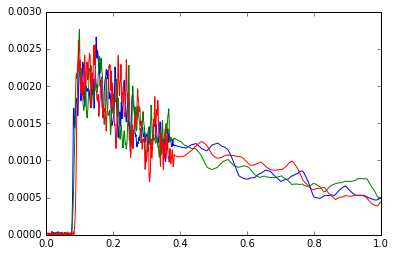

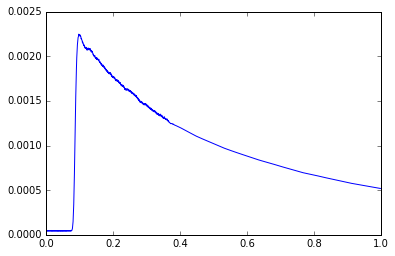

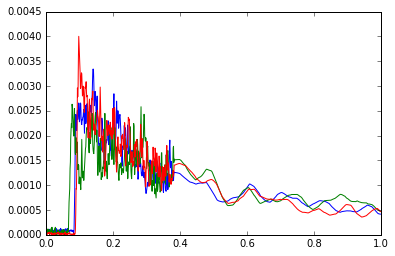

(1572, 1000)


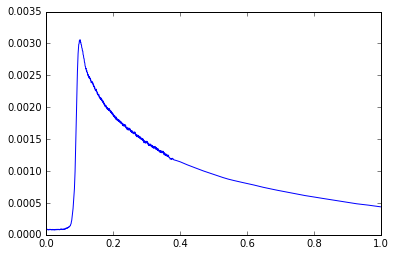

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from root_pandas import read_root

RefPulse = read_root("RefPulse.root","tree",columns=["PMTALL"],flatten=["PMTALL"])

lr,hr = RefPulse.shape
lr=int(lr/4480)

from sklearn.preprocessing import normalize

def NORMPMTALL(pmtall,num_entries):
    """
    Convert read_root into numpy for speed
    invert the PMT pulse
    get rid of the last 80 bin as those bins of the pulse do not matter
    """
    x = pmtall.PMTALL.values.reshape(num_entries,4480)
    x_abs = abs(x-15190)
    extra = np.arange(1000,4480)
#     initial = np.arange(50)

    x_mod = np.delete(x_abs,extra,axis=1)
#     x_f = np.delete(x_mod,initial,axis=1)
    x_nor = normalize(x_mod,norm="l1")
    # print(np.sum(x_nor,axis=1))
    return x_nor

RefPul = NORMPMTALL(RefPulse,lr)
print(RefPul.shape)

plot_x = np.arange(0,1,1/len(RefPul[0]))
plt.figure()
plt.plot(plot_x,RefPul[np.random.randint(100)])
plt.plot(plot_x,RefPul[np.random.randint(100)])
plt.plot(plot_x,RefPul[np.random.randint(100)])
plt.show()

def avg(x):
    y = np.average(x,axis=0)
    return y

plt.figure()
plt.plot(plot_x,avg(RefPul))
plt.show()

alpha = read_root("Alpha_11.root","tree",columns=["PMTALL"],flatten=["PMTALL"])

la,ha = alpha.shape
la=int(la/4480)

Alpha = NORMPMTALL(alpha,la)

plot_a = np.arange(0,1,1/len(Alpha[0]))
plt.figure()
plt.plot(plot_a,Alpha[np.random.randint(len(Alpha))])
plt.plot(plot_a,Alpha[np.random.randint(len(Alpha))])
plt.plot(plot_a,Alpha[np.random.randint(len(Alpha))])
plt.show()
print(Alpha.shape)

plt.figure()
plt.plot(plot_a,avg(Alpha))
plt.show()